In [2]:
import argparse
import numpy as np
import nibabel as nib
from tqdm import tqdm_notebook as tqdm
import matplotlib.pyplot as plt

In [3]:
from scipy.stats import zscore

In [4]:
%matplotlib inline

In [5]:
def average_corr_across_sessions(correlation_matrix):
    avg = np.zeros((750,750))
    for i in range(40):
        avg = avg + correlation_matrix[750*i:750*(i+1),750*i:750*(i+1)]

    avg = avg/40
    return avg

## ROI voxels

In [6]:
mat = np.load("../output/cortical_voxel_across_sessions_subj01_roi_only.npy")

In [7]:
mat.shape

(30000, 15660)

Text(0.5, 1.0, 'Random Voxel response')

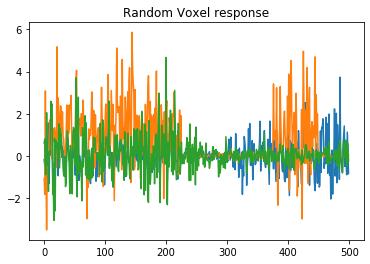

In [8]:
plt.plot(mat[:5000:10,100])
plt.plot(mat[:5000:10,10000])
plt.plot(mat[:5000:10,91])

plt.title("Random Voxel response")

### Mean and standard deviation of each run

In [9]:
def compute_means_of_runs(mat):
    all_means = np.zeros((480,mat.shape[1]))

    index_so_far = 0
    for i in tqdm(range(480)):
        if i%2==0:
            all_means[i,:] = mat[index_so_far:index_so_far + 62,:].mean(0)
            index_so_far += 62
        else:
            all_means[i,:] = mat[index_so_far:index_so_far + 63,:].mean(0)
            index_so_far += 63
    return all_means

In [10]:
def compute_stds_of_runs(mat):
    all_stds = np.zeros((480,mat.shape[1]))

    index_so_far = 0
    for i in tqdm(range(480)):
        if i%2==0:
            all_stds[i,:] = mat[index_so_far:index_so_far + 62,:].std(0)
            index_so_far += 62
        else:
            all_stds[i,:] = mat[index_so_far:index_so_far + 63,:].std(0)
            index_so_far += 63
    return all_stds

In [21]:
all_means_roi = compute_means_of_runs(mat)
all_stds_roi = compute_stds_of_runs(mat)

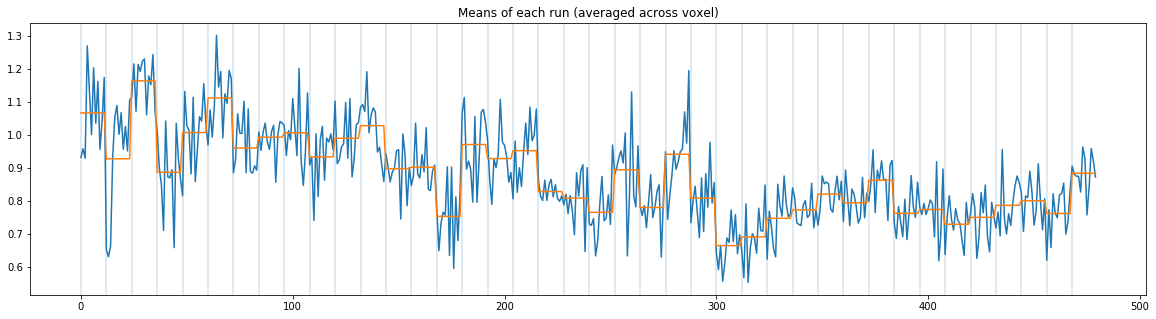

In [28]:
plt.figure(figsize=(20,5))
plt.plot(all_means_roi.mean(1))
means_by_session_roi = list()
# plt.ylim(0,1.5)
for i in range(40):
    plt.axvline(x=12*i, linewidth=0.3)
    means_by_session_roi.append(np.mean(all_means_roi.mean(1)[12*i:12*(i+1)]))

plt.plot(np.repeat(means_by_session_roi, 12))
plt.title("Means of each run (averaged across voxel)")
plt.savefig("../figures/means_of_runs_avg_across_voxels_roi_subj1.png")

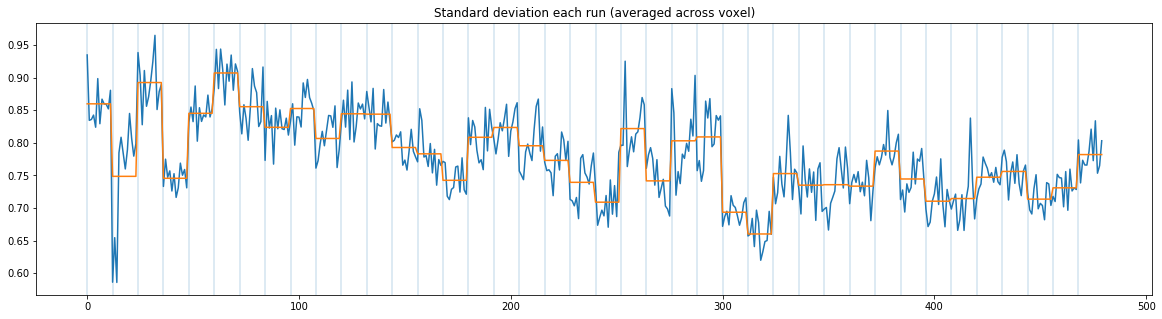

In [29]:
plt.figure(figsize=(20,5))
plt.plot(all_stds_roi.mean(1))
stds_by_session_roi = list()
# plt.ylim(0,1.2)
for i in range(40):
    plt.axvline(x=12*i, linewidth=0.3)
    stds_by_session_roi.append(np.mean(all_stds_roi.mean(1)[12*i:12*(i+1)]))

plt.plot(np.repeat(stds_by_session_roi, 12))
plt.title("Standard deviation each run (averaged across voxel)")
plt.savefig("../figures/stds_of_runs_avg_across_voxels_roi_subj1.png")

### Autocorrelations

In [42]:
corrmat = np.corrcoef(mat)

In [43]:
corrmat.shape

(30000, 30000)

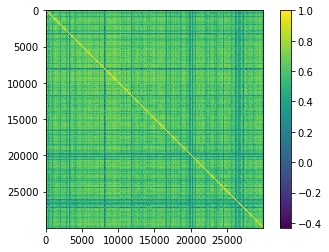

In [44]:
plt.imshow(corrmat)
plt.colorbar()

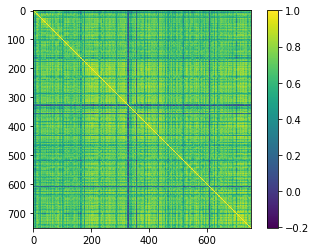

In [45]:
plt.imshow(corrmat[:750,:750])
plt.colorbar()

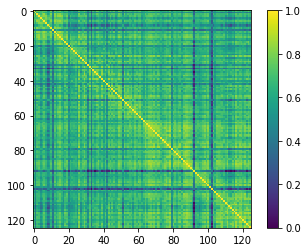

In [46]:
plt.imshow(corrmat[:125,:125])
plt.colorbar()

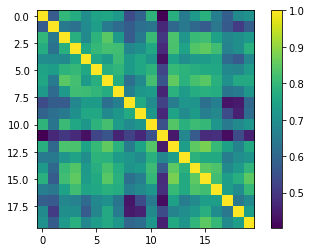

In [47]:
plt.imshow(corrmat[:20,:20])
plt.colorbar()

### Autocorrelation averaged across sessions

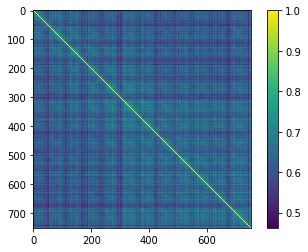

In [76]:
avg = np.zeros((750,750))
for i in range(40):
    avg = avg + corrmat[750*i:750*(i+1),750*i:750*(i+1)]
avg = avg/40
plt.imshow(avg)
plt.colorbar()

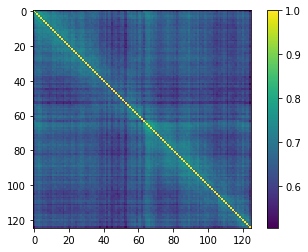

In [78]:
plt.imshow(avg[:125,:125])
plt.colorbar()

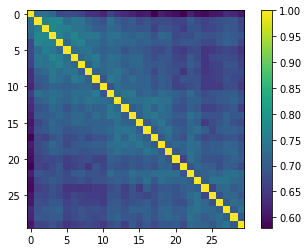

In [81]:
plt.imshow(avg[:30,:30])
plt.colorbar()

### Autocorrelations after zscoring by voxels

In [25]:
mat_zscored_by_voxel = zscore(mat)

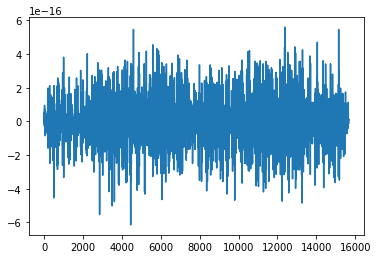

In [36]:
# check all voxels has zero means across trials
plt.plot(np.mean(mat_zscored_by_voxel, axis=0))

In [37]:
corrmat_zscored_by_voxel = np.corrcoef(mat_zscored_by_voxel)

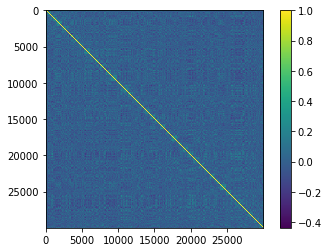

In [45]:
plt.imshow(corrmat_zscored_by_voxel)
plt.colorbar()

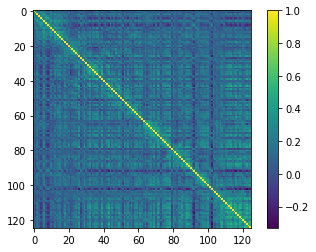

In [46]:
plt.imshow(corrmat_zscored_by_voxel[:125,:125])
plt.colorbar()

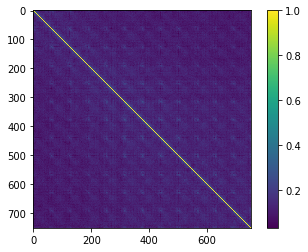

In [47]:
avg_zscored_by_voxel = average_corr_across_sessions(corrmat_zscored_by_voxel)
plt.imshow(avg_zscored_by_voxel)
plt.colorbar()

## Cortical voxels

In [14]:
mat_full = np.load("../output/cortical_voxel_across_sessions_subj01.npy")

In [15]:
mat_full.shape

(30000, 107131)

In [17]:
all_means = compute_means_of_runs(mat_full)
all_stds = compute_stds_of_runs(mat_full)

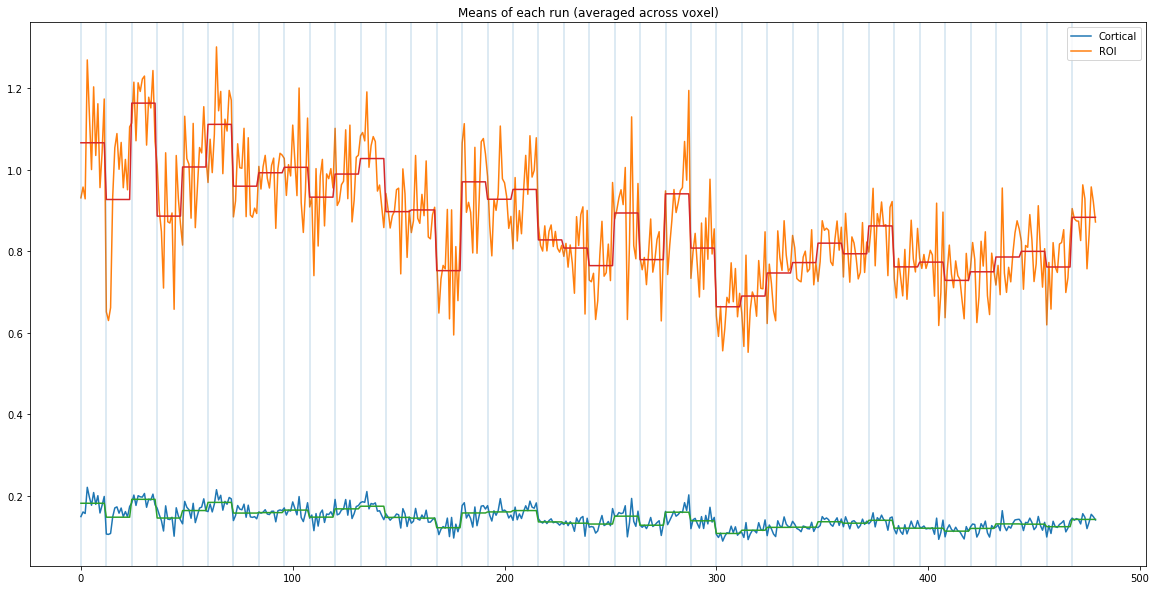

In [36]:
plt.figure(figsize=(20,10))
plt.plot(all_means.mean(1), label="Cortical")
plt.plot(all_means_roi.mean(1), label="ROI")
means_by_session = list()
# plt.ylim(0,1.5)
for i in range(40):
    plt.axvline(x=12*i, linewidth=0.3)
    means_by_session.append(np.mean(all_means.mean(1)[12*i:12*(i+1)]))

plt.plot(np.repeat(means_by_session, 12))
plt.plot(np.repeat(means_by_session_roi, 12))

plt.legend()
plt.title("Means of each run (averaged across voxel)")
plt.savefig("../figures/means_of_runs_avg_across_voxels_subj1.png")

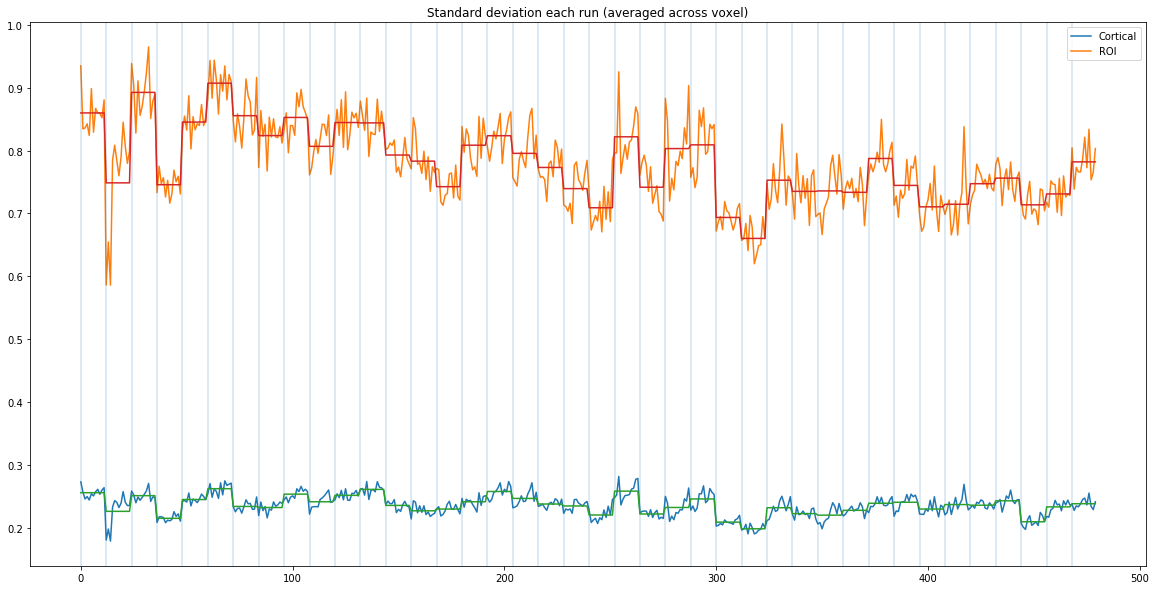

In [35]:
plt.figure(figsize=(20,10))
plt.plot(all_stds.mean(1), label="Cortical")
plt.plot(all_stds_roi.mean(1), label="ROI")

stds_by_session = list()
# plt.ylim(0,1.2)
for i in range(40):
    plt.axvline(x=12*i, linewidth=0.3)
    stds_by_session.append(np.mean(all_stds.mean(1)[12*i:12*(i+1)]))

plt.plot(np.repeat(stds_by_session, 12))
plt.plot(np.repeat(stds_by_session_roi, 12))

plt.legend()
plt.title("Standard deviation each run (averaged across voxel)")
plt.savefig("../figures/stds_of_runs_avg_across_voxels_subj1.png")

### Autocorrelations

In [60]:
corrmat_full = np.corrcoef(mat_full)

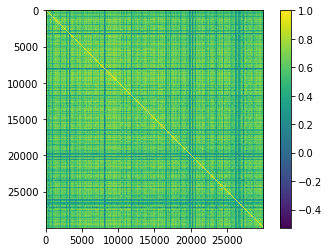

In [61]:
plt.imshow(corrmat_full)
plt.colorbar()

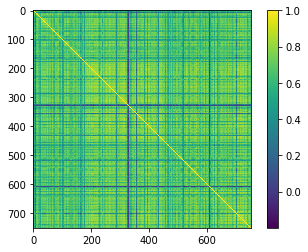

In [62]:
plt.imshow(corrmat_full[:750,:750])
plt.colorbar()

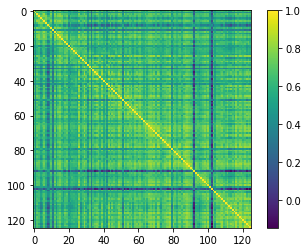

In [63]:
plt.imshow(corrmat_full[:125,:125])
plt.colorbar()

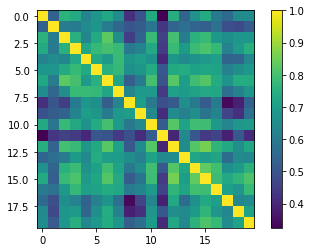

In [65]:
plt.imshow(corrmat_full[:20,:20])
plt.colorbar()

In [70]:
corrmat_full.shape

(30000, 30000)

In [82]:
avg = np.zeros((750,750))
for i in range(40):
    avg = avg + corrmat_full[750*i:750*(i+1),750*i:750*(i+1)]
    
avg = avg/40

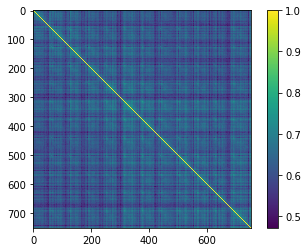

In [83]:
plt.imshow(avg)
plt.colorbar()

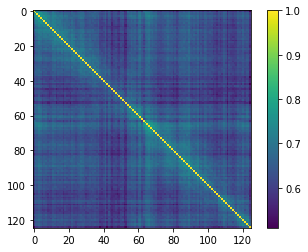

In [84]:
plt.imshow(avg[:125,:125])
plt.colorbar()


## Zscore within session (cortical)

In [49]:
zscored_mat = np.zeros(mat_full.shape)
for i in tqdm(range(40)):
     zscored_mat[750*i:750*(i+1),:] = zscore(mat_full[750*i:750*(i+1),:])

In [8]:
corrmat_full_zscored = np.corrcoef(zscored_mat)

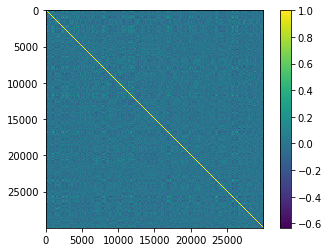

In [12]:
plt.imshow(corrmat_full_zscored)
plt.colorbar()

In [13]:
avg = np.zeros((750,750))
for i in range(40):
    avg = avg + corrmat_full_zscored[750*i:750*(i+1),750*i:750*(i+1)]
    
avg = avg/40

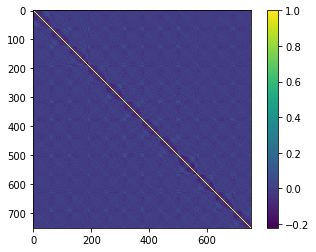

In [14]:
plt.imshow(avg)
plt.colorbar()

In [50]:
all_means_z_ses = compute_means_of_runs(zscored_mat)
all_stds_z_ses = compute_stds_of_runs(zscored_mat)

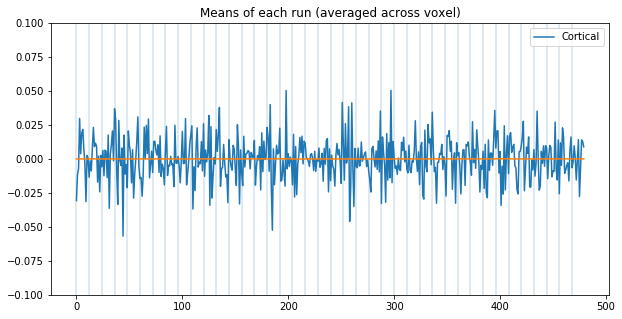

In [53]:
plt.figure(figsize=(10,5))
plt.plot(all_means_z_ses.mean(1), label="Cortical")
# plt.plot(all_means_roi.mean(1), label="ROI")
means_by_session_z_ses = list()
plt.ylim(-0.1,0.1)
for i in range(40):
    plt.axvline(x=12*i, linewidth=0.3)
    means_by_session_z_ses.append(np.mean(all_means_z_ses.mean(1)[12*i:12*(i+1)]))

plt.plot(np.repeat(means_by_session_z_ses, 12))
# plt.plot(np.repeat(means_by_session_roi, 12))

plt.legend()
plt.title("Means of each run (averaged across voxel)")
plt.savefig("../figures/means_of_runs_avg_across_voxels_subj1_zscore_by_session.png")

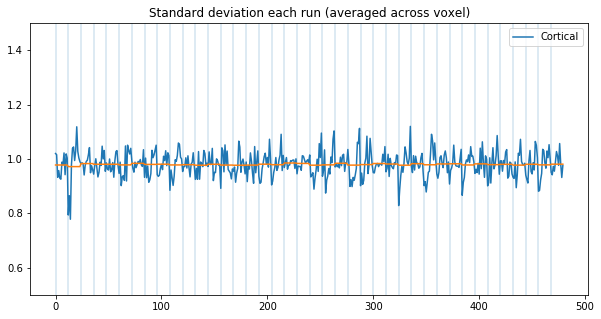

In [54]:
plt.figure(figsize=(10,5))
plt.plot(all_stds_z_ses.mean(1), label="Cortical")
# plt.plot(all_stds_roi.mean(1), label="ROI")

stds_by_session_z_ses = list()
plt.ylim(0.5,1.5)
for i in range(40):
    plt.axvline(x=12*i, linewidth=0.3)
    stds_by_session_z_ses.append(np.mean(all_stds_z_ses.mean(1)[12*i:12*(i+1)]))

plt.plot(np.repeat(stds_by_session_z_ses, 12))
# plt.plot(np.repeat(stds_by_session_roi, 12))

plt.legend()
plt.title("Standard deviation each run (averaged across voxel)")
plt.savefig("../figures/stds_of_runs_avg_across_voxels_subj1_zscore_by_session.png")

## Zscore within run (cortical)

In [37]:
zscored_by_run_mat = np.zeros(mat_full.shape)
index_so_far = 0
for i in tqdm(range(480)):
    if i%2==0:
        zscored_by_run_mat[index_so_far:index_so_far + 62,:] = zscore(mat_full[index_so_far:index_so_far + 62,:])
        index_so_far += 62
    else:
        zscored_by_run_mat[index_so_far:index_so_far + 63,:] = zscore(mat_full[index_so_far:index_so_far + 63,:])
        index_so_far += 63

In [57]:
np.save("../output/cortical_voxel_across_sessions_zscored_by_run_subj01.npy", zscored_by_run_mat)

In [ ]:
corrmat_full_zscored_by_run = np.corrcoef(zscored_by_run_mat)

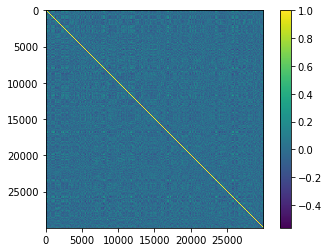

In [19]:
plt.imshow(corrmat_full_zscored_by_run)
plt.colorbar()

In [40]:
all_means_z = compute_means_of_runs(zscored_by_run_mat)
all_stds_z = compute_stds_of_runs(zscored_by_run_mat)

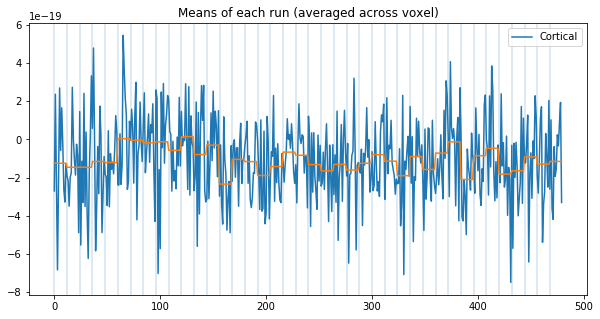

In [56]:
plt.figure(figsize=(10,5))
plt.plot(all_means_z.mean(1), label="Cortical")
# plt.plot(all_means_roi.mean(1), label="ROI")
means_by_session_z = list()
# plt.ylim(-0.001,0.001)
for i in range(40):
    plt.axvline(x=12*i, linewidth=0.3)
    means_by_session_z.append(np.mean(all_means_z.mean(1)[12*i:12*(i+1)]))

plt.plot(np.repeat(means_by_session_z, 12))
# plt.plot(np.repeat(means_by_session_roi, 12))

plt.legend()
plt.title("Means of each run (averaged across voxel)")
plt.savefig("../figures/means_of_runs_avg_across_voxels_subj1_zscore_by_run.png")

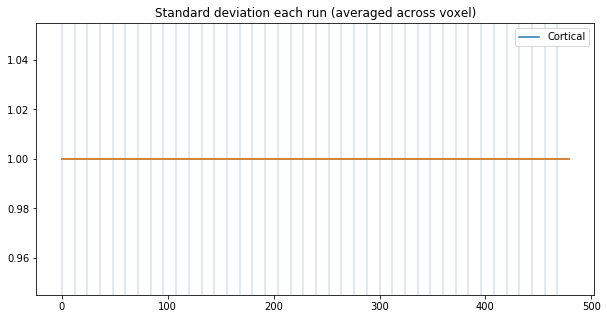

In [55]:
plt.figure(figsize=(10,5))
plt.plot(all_stds_z.mean(1), label="Cortical")
# plt.plot(all_stds_roi.mean(1), label="ROI")

stds_by_session_z = list()
# plt.ylim(0,1.2)
for i in range(40):
    plt.axvline(x=12*i, linewidth=0.3)
    stds_by_session_z.append(np.mean(all_stds_z.mean(1)[12*i:12*(i+1)]))

plt.plot(np.repeat(stds_by_session_z, 12))
# plt.plot(np.repeat(stds_by_session_roi, 12))

plt.legend()
plt.title("Standard deviation each run (averaged across voxel)")
plt.savefig("../figures/stds_of_runs_avg_across_voxels_subj1_zscore_by_run.png")

## zscore ROIS

In [58]:
zscored_by_run_roi = np.zeros(mat.shape)
index_so_far = 0
for i in tqdm(range(480)):
    if i%2==0:
        zscored_by_run_roi[index_so_far:index_so_far + 62,:] = zscore(mat[index_so_far:index_so_far + 62,:])
        index_so_far += 62
    else:
        zscored_by_run_roi[index_so_far:index_so_far + 63,:] = zscore(mat[index_so_far:index_so_far + 63,:])
        index_so_far += 63

In [59]:
np.save("../output/cortical_voxel_across_sessions_zscored_by_run_subj01_roi_only.npy", zscored_by_run_roi)